## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn import preprocessing

%matplotlib inline

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("train_dataset_train.csv")

/tmp/ipykernel_8832/1091673467.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_dataset_train.csv")


## Рассмотрим датасет по ближе

In [4]:
df.head(3)

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0


In [5]:
len(df)

6000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [7]:
df.isnull().any()

id                               False
oper_type + oper_attr            False
index_oper                       False
type                             False
priority                         False
is_privatecategory               False
class                            False
is_in_yandex                     False
is_return                        False
weight                           False
mailtype                         False
mailctg                          False
mailrank                         False
directctg                        False
transport_pay                    False
postmark                         False
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name               False
is_wrong_rcpn_name       

In [8]:
cols_numeric = []

for y in df.columns:
    if(df[y].dtype == np.float64 or df[y].dtype == np.int64) and y not in ['id', 'label']:
        print(y)
        data = df[y]
        threshold = 3
        mean = np.mean(data)
        std = np.std(data)
        
        outlier = []
        outlier_idx = []
        inlier = []
        print(mean, std)
        if std != 0:
            for idx, i in enumerate(data):
                z = (i-mean)/std
                if z > threshold:
                    outlier.append(i)
                    outlier_idx.append(idx)
                else:
                    inlier.append(i)

            col = df[y].to_numpy()
            col[outlier_idx] = np.median(inlier)
            df[y] = col

priority
7499.8242746666665 175.1916670851593
class
0.35719233333333333 0.9861571732029452
weight
239.99364683333334 450.40014136414067
mailtype
4.995037 0.1562659121448847
mailctg
0.7726733333333333 0.44075721203065404
mailrank
0.0 0.0
directctg
1.9883881666666667 0.10737162253311823
transport_pay
11.876612275001149 22.247936039450597
postmark
0.090698 7.296575900835075
weight_mfi
123.65528183333333 208.4230027404516
price_mfi
456.0945126666667 2103.2905558280904
dist_qty_oper_login_1
319.06891533333334 401.24935934557686
total_qty_oper_login_1
27750951.1819545 29036542.693652563
total_qty_oper_login_0
28988865.260902 53342611.19885118
total_qty_over_index_and_type
56739816.4428565 72903873.76929314
total_qty_over_index
71786861.03414133 75092691.47217274
is_wrong_sndr_name
0.002564166666666667 0.05057263801401064
is_wrong_rcpn_name
0.2597736666666667 0.43851032913847526
is_wrong_phone_number
0.170971 0.37648362137820734
is_wrong_address
0.0012628333333333333 0.035513921007198315


In [9]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976.0,ММПО,7503.0,N,0.0,N,N,25.0,...,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963.0,Цех,7503.0,N,0.0,Y,N,83.0,...,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971.0,Цех,7506.0,N,0.0,N,N,103.0,...,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152.0,Цех,7506.0,N,0.0,N,N,269.0,...,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [10]:
oper_type = []
oper_attr = []
for e in df['oper_type + oper_attr'].to_numpy():
    e = e.split('_')
    oper_type.append(int(e[0]))
    oper_attr.append(int(e[1]))
df['oper_type'] = np.array(oper_type)
df['oper_attr'] = np.array(oper_attr)

In [11]:
np.shape(np.unique(df['is_privatecategory']))

(3,)

In [12]:
le_1 = preprocessing.LabelEncoder()
le_1.fit(np.unique(df['name_mfi']))
df['name_mfi'] = le_1.transform(df['name_mfi'].to_numpy())
le_2 = preprocessing.LabelEncoder()
le_2.fit(np.unique(df['is_privatecategory']))
df['is_privatecategory'] = le_2.transform(df['is_privatecategory'].to_numpy())
le_3 = preprocessing.LabelEncoder()
le_3.fit(np.unique(df['oper_type + oper_attr']))
df['oper_type + oper_attr'] = le_3.transform(df['oper_type + oper_attr'].to_numpy())

In [13]:
df["label"].value_counts()

0    5829020
1     170980
Name: label, dtype: int64

Рассмотрим часть столбцов типа "object"

In [14]:
df["is_in_yandex"].value_counts()

N    3585956
Y    2411374
0       2670
Name: is_in_yandex, dtype: int64

In [15]:
df["is_return"].value_counts()

N    5993017
Y       6983
Name: is_return, dtype: int64

Эти категории можно сделать ранговыми 

In [16]:
df["is_in_yandex"] = pd.Categorical(df["is_in_yandex"])
df["is_in_yandex"].astype('category').cat.codes
df["is_in_yandex"] = df["is_in_yandex"].cat.codes

In [17]:
df["is_return"] = pd.Categorical(df["is_return"])
df["is_return"].astype('category').cat.codes
df["is_return"] = df["is_return"].cat.codes

Посмотрим на некоторые столбцы

<AxesSubplot:xlabel='class', ylabel='count'>

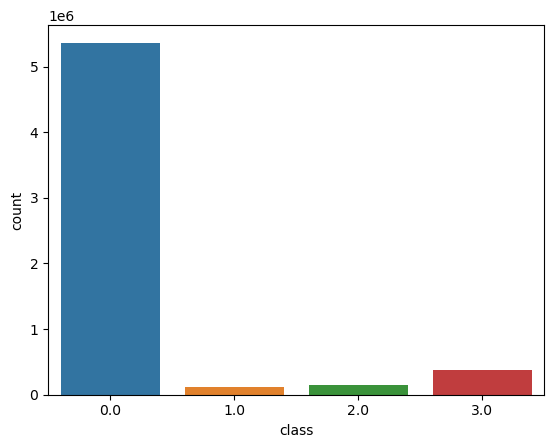

In [18]:
sns.countplot(x = "class" , data  = df)

<AxesSubplot:xlabel='weight', ylabel='count'>

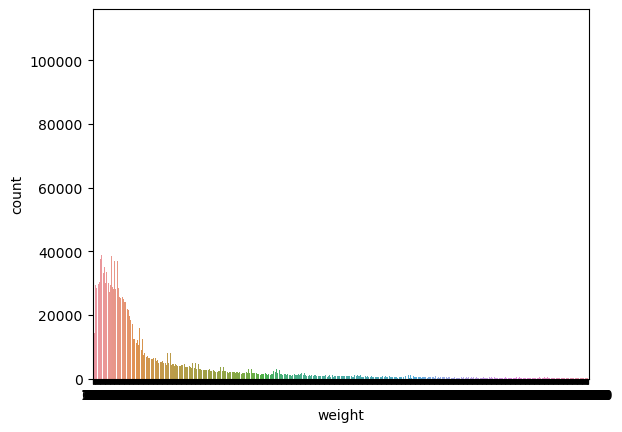

In [19]:
sns.countplot(x = "weight" , data  = df)

Псотроим матрицу корреляции значений

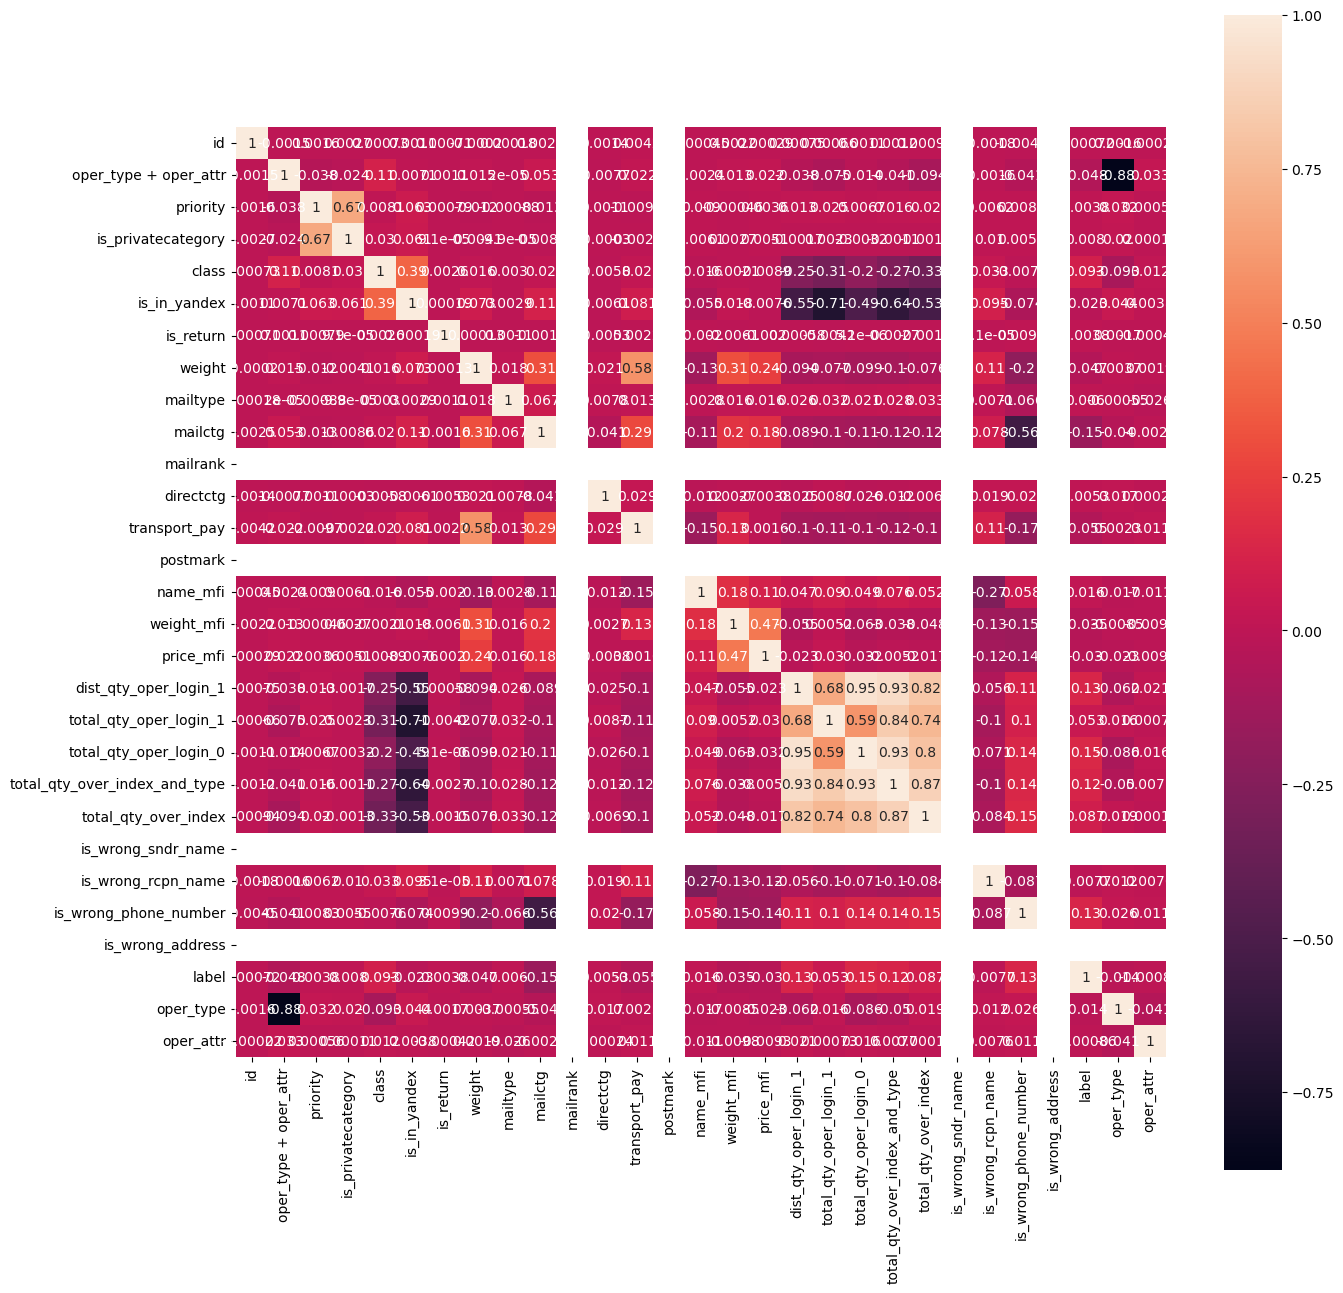

In [20]:
plt.rcParams['figure.figsize']=(15,15)


corr = df.iloc[:100000].corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [21]:
df.isna().any()

id                               False
oper_type + oper_attr            False
index_oper                       False
type                             False
priority                         False
is_privatecategory               False
class                            False
is_in_yandex                     False
is_return                        False
weight                           False
mailtype                         False
mailctg                          False
mailrank                         False
directctg                        False
transport_pay                    False
postmark                         False
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name               False
is_wrong_rcpn_name       

In [22]:
df['label']

0          0
1          0
2          0
3          0
4          0
          ..
5999995    0
5999996    0
5999997    0
5999998    0
5999999    0
Name: label, Length: 6000000, dtype: int64

In [23]:
np.unique(df['label'].to_numpy())

array([0, 1])

In [24]:
#df.isin([0]).any()

In [25]:
df = df.fillna(0)

In [26]:
len(df)

6000000

Обьединим список не нужных строк с списком строк типа object

In [27]:
col_obj = df.select_dtypes(include=['object']).columns.values
col_obj = list(set(col_obj) ^ set(["id", "label"]))

In [28]:
col_obj

['id', 'label', 'type', 'index_oper']

In [29]:
X = df.drop(col_obj, axis = 1)
y = df[["label"]]

In [30]:
from sklearn.preprocessing  import MinMaxScaler

In [31]:
X.head(5)

,oper_type + oper_attr,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,...,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,oper_type,oper_attr
0,26,7503.0,1,0.0,2,0,87.0,5.0,1.0,0.0,...,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,1043,-1
1,20,7503.0,1,0.0,1,0,107.0,5.0,1.0,0.0,...,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,1023,-1
2,15,7503.0,1,0.0,2,0,50.0,5.0,1.0,0.0,...,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,1018,-1
3,16,7503.0,1,0.0,2,0,416.0,5.0,1.0,0.0,...,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,1019,-1
4,17,7503.0,1,0.0,2,0,795.0,5.0,1.0,0.0,...,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,1020,-1


In [32]:
#m = X['price_mfi_div_weight_mfi'].to_numpy()
#m[np.isfinite(X['price_mfi_div_weight_mfi'])] = 0
#X['price_mfi_div_weight_mfi'] = m

In [33]:
X.columns

Index(['oper_type + oper_attr', 'priority', 'is_privatecategory', 'class',
       'is_in_yandex', 'is_return', 'weight', 'mailtype', 'mailctg',
       'mailrank', 'directctg', 'transport_pay', 'postmark', 'name_mfi',
       'weight_mfi', 'price_mfi', 'dist_qty_oper_login_1',
       'total_qty_oper_login_1', 'total_qty_oper_login_0',
       'total_qty_over_index_and_type', 'total_qty_over_index',
       'is_wrong_sndr_name', 'is_wrong_rcpn_name', 'is_wrong_phone_number',
       'is_wrong_address', 'oper_type', 'oper_attr'],
      dtype='object')

In [34]:
X['price_mfi_div_weight'] = X['price_mfi'] / X['weight']

In [35]:
#X['price_mfi_div_weight_mfi'] = X['price_mfi'] / X['weight_mfi']

In [36]:
m = X.loc[X['price_mfi_div_weight'] != np.inf, 'price_mfi_div_weight'].max()
X['price_mfi_div_weight'].replace(np.inf,m,inplace=True)

In [37]:
#m = X.loc[X['price_mfi_div_weight_mfi'] != np.inf, 'price_mfi_div_weight_mfi'].max()
#X['price_mfi_div_weight_mfi'].replace(np.inf,m,inplace=True)

In [38]:
for col in X.columns:
    if col not in ['price_mfi_div_weight_mfi']:
        transformer = MinMaxScaler().fit(X[col].to_numpy().reshape(-1, 1))
        X[col] = transformer.transform(X[col].to_numpy().reshape(-1, 1))

In [39]:
X['price_mfi_div_weight']

0          0.001999
1          0.004335
2          0.005056
3          0.000279
4          0.001459
             ...   
5999995    0.004639
5999996    0.025597
5999997    0.009007
5999998    0.000000
5999999    0.011314
Name: price_mfi_div_weight, Length: 6000000, dtype: float64

In [40]:
X

,oper_type + oper_attr,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,...,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,oper_type,oper_attr,price_mfi_div_weight
0,0.240741,0.9996,0.5,0.0,1.0,0.0,0.054683,1.0,1.0,0.0,...,0.000506,0.004312,0.037917,0.0,0.0,0.0,0.0,0.998086,0.000000,0.001999
1,0.185185,0.9996,0.5,0.0,0.5,0.0,0.067253,1.0,1.0,0.0,...,0.715598,0.731453,0.625716,0.0,0.0,0.0,0.0,0.978947,0.000000,0.004335
2,0.138889,0.9996,0.5,0.0,1.0,0.0,0.031427,1.0,1.0,0.0,...,0.027768,0.035856,0.241049,0.0,1.0,0.0,0.0,0.974163,0.000000,0.005056
3,0.148148,0.9996,0.5,0.0,1.0,0.0,0.261471,1.0,1.0,0.0,...,0.005611,0.015020,0.089464,0.0,0.0,0.0,0.0,0.975120,0.000000,0.000279
4,0.157407,0.9996,0.5,0.0,1.0,0.0,0.499686,1.0,1.0,0.0,...,0.000240,0.001908,0.021582,0.0,0.0,0.0,0.0,0.976077,0.000000,0.001459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,0.175926,0.9996,0.5,0.0,0.5,0.0,0.015713,1.0,0.5,0.0,...,1.000000,1.000000,0.861643,0.0,0.0,1.0,0.0,0.977990,0.000000,0.004639
5999996,0.175926,0.9996,0.5,0.0,1.0,0.0,0.052168,1.0,1.0,0.0,...,0.001237,0.010578,0.071261,0.0,0.0,0.0,0.0,0.977990,0.000000,0.025597
5999997,0.222222,1.0000,0.5,0.0,0.5,0.0,0.064739,1.0,1.0,0.0,...,0.000091,0.335490,0.345706,0.0,0.0,0.0,0.0,0.996172,0.000000,0.009007
5999998,0.138889,1.0000,0.5,0.0,0.5,0.0,0.169076,1.0,1.0,0.0,...,0.042706,0.111032,0.182879,0.0,1.0,0.0,0.0,0.974163,0.000000,0.000000


In [41]:
X['price_mfi_div_weight']

0          0.001999
1          0.004335
2          0.005056
3          0.000279
4          0.001459
             ...   
5999995    0.004639
5999996    0.025597
5999997    0.009007
5999998    0.000000
5999999    0.011314
Name: price_mfi_div_weight, Length: 6000000, dtype: float64

In [42]:
X = X.fillna(0)

In [43]:
np.isnan(X).any()

oper_type + oper_attr            False
priority                         False
is_privatecategory               False
class                            False
is_in_yandex                     False
is_return                        False
weight                           False
mailtype                         False
mailctg                          False
mailrank                         False
directctg                        False
transport_pay                    False
postmark                         False
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name               False
is_wrong_rcpn_name               False
is_wrong_phone_number            False
is_wrong_address                 False
oper_type                

In [44]:
#X = X.drop(['is_privatecategory',], axis = 1)

In [45]:
#X = X.drop(['is_return',], axis = 1)

In [46]:
#X = X.drop(['mailtype',], axis = 1)

In [47]:
#X = X.drop(['mailrank',], axis = 1)

In [48]:
#X = X.drop(['directctg',], axis = 1)

In [49]:
#X = X.drop(['postmark',], axis = 1)

In [50]:
#X = X.drop(['is_wrong_sndr_name',], axis = 1)

In [51]:
#X = X.drop(['is_wrong_address',], axis = 1)

In [109]:
X = X.drop(['name_mfi',], axis = 1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Обучение модели

In [111]:
from sklearn import metrics

In [112]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=1000, verbose=5, task_type="GPU", devices='0:1')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.034298
0:	learn: 0.5615988	test: 0.5616479	best: 0.5616479 (0)	total: 37.4ms	remaining: 37.4s
5:	learn: 0.2290262	test: 0.2291638	best: 0.2291638 (5)	total: 201ms	remaining: 33.3s
10:	learn: 0.1194791	test: 0.1196321	best: 0.1196321 (10)	total: 358ms	remaining: 32.2s
15:	learn: 0.0843302	test: 0.0845107	best: 0.0845107 (15)	total: 513ms	remaining: 31.5s
20:	learn: 0.0639729	test: 0.0641630	best: 0.0641630 (20)	total: 668ms	remaining: 31.1s
25:	learn: 0.0552345	test: 0.0554385	best: 0.0554385 (25)	total: 822ms	remaining: 30.8s
30:	learn: 0.0523083	test: 0.0525300	best: 0.0525300 (30)	total: 978ms	remaining: 30.6s
35:	learn: 0.0494630	test: 0.0496915	best: 0.0496915 (35)	total: 1.13s	remaining: 30.3s
40:	learn: 0.0479366	test: 0.0481673	best: 0.0481673 (40)	total: 1.29s	remaining: 30.1s
45:	learn: 0.0468195	test: 0.0470482	best: 0.0470482 (45)	total: 1.44s	remaining: 29.9s
50:	learn: 0.0460157	test: 0.0462443	best: 0.0462443 (50)	total: 1.6s	remaining: 29.8s
55:	le

460:	learn: 0.0392957	test: 0.0396797	best: 0.0396797 (460)	total: 14s	remaining: 16.4s
465:	learn: 0.0392835	test: 0.0396688	best: 0.0396688 (465)	total: 14.1s	remaining: 16.2s
470:	learn: 0.0392707	test: 0.0396576	best: 0.0396576 (470)	total: 14.3s	remaining: 16.1s
475:	learn: 0.0392591	test: 0.0396476	best: 0.0396476 (475)	total: 14.4s	remaining: 15.9s
480:	learn: 0.0392461	test: 0.0396326	best: 0.0396326 (480)	total: 14.6s	remaining: 15.7s
485:	learn: 0.0392405	test: 0.0396287	best: 0.0396287 (485)	total: 14.7s	remaining: 15.6s
490:	learn: 0.0392328	test: 0.0396218	best: 0.0396218 (490)	total: 14.9s	remaining: 15.4s
495:	learn: 0.0392207	test: 0.0396101	best: 0.0396101 (495)	total: 15s	remaining: 15.3s
500:	learn: 0.0392072	test: 0.0395963	best: 0.0395963 (500)	total: 15.2s	remaining: 15.1s
505:	learn: 0.0392006	test: 0.0395911	best: 0.0395911 (505)	total: 15.3s	remaining: 15s
510:	learn: 0.0391926	test: 0.0395844	best: 0.0395844 (510)	total: 15.5s	remaining: 14.8s
515:	learn: 0.03

920:	learn: 0.0384912	test: 0.0389515	best: 0.0389515 (920)	total: 27.7s	remaining: 2.38s
925:	learn: 0.0384847	test: 0.0389459	best: 0.0389459 (925)	total: 27.9s	remaining: 2.23s
930:	learn: 0.0384815	test: 0.0389436	best: 0.0389436 (930)	total: 28s	remaining: 2.08s
935:	learn: 0.0384729	test: 0.0389345	best: 0.0389345 (935)	total: 28.2s	remaining: 1.93s
940:	learn: 0.0384652	test: 0.0389271	best: 0.0389271 (940)	total: 28.3s	remaining: 1.78s
945:	learn: 0.0384552	test: 0.0389176	best: 0.0389176 (945)	total: 28.5s	remaining: 1.63s
950:	learn: 0.0384497	test: 0.0389129	best: 0.0389129 (950)	total: 28.6s	remaining: 1.48s
955:	learn: 0.0384461	test: 0.0389109	best: 0.0389109 (955)	total: 28.8s	remaining: 1.32s
960:	learn: 0.0384434	test: 0.0389092	best: 0.0389092 (960)	total: 28.9s	remaining: 1.17s
965:	learn: 0.0384397	test: 0.0389069	best: 0.0389069 (965)	total: 29.1s	remaining: 1.02s
970:	learn: 0.0384372	test: 0.0389057	best: 0.0389057 (970)	total: 29.2s	remaining: 873ms
975:	learn: 

In [55]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

## Оценка точности

In [120]:
clf.feature_names_in_

array(['oper_type + oper_attr', 'priority', 'is_privatecategory', 'class',
       'is_in_yandex', 'is_return', 'weight', 'mailtype', 'mailctg',
       'mailrank', 'directctg', 'transport_pay', 'postmark', 'name_mfi',
       'weight_mfi', 'price_mfi', 'dist_qty_oper_login_1',
       'total_qty_oper_login_1', 'total_qty_oper_login_0',
       'total_qty_over_index_and_type', 'total_qty_over_index',
       'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address', 'oper_type',
       'oper_attr', 'price_mfi_div_weight'], dtype=object)

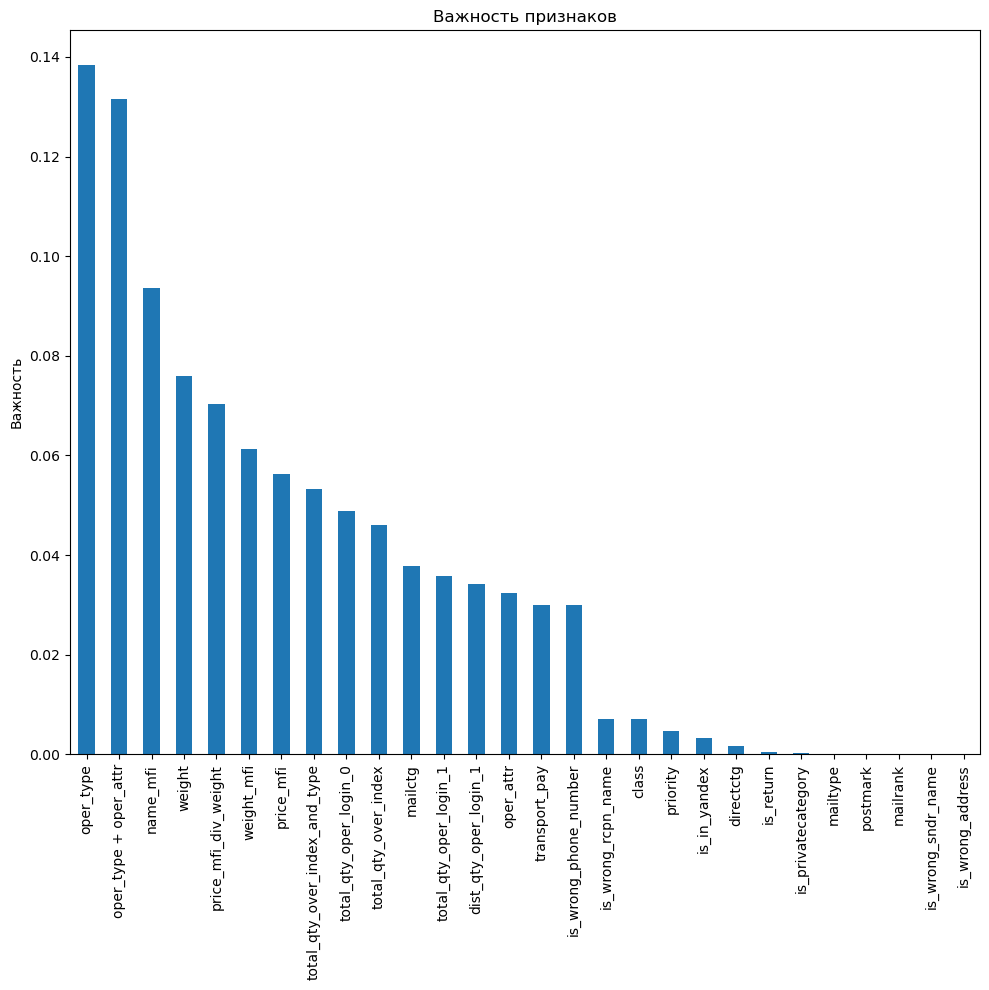

In [129]:
skl_iris_imp = pd.Series(clf.feature_importances_, clf.feature_names_in_).sort_values(ascending=False)
#skl_iris_imp.sort_values
fig, ax = plt.subplots(figsize=(10,10))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

In [163]:
pred = clf.predict(X_test)

In [164]:
score = recall_score(y_test, pred, average="macro")

In [165]:
print("Recall", score)

Recall 0.7890387333037784


## Предсказание

In [120]:
df_test = pd.read_csv("test_dataset_test.csv", error_bad_lines=False, index_col=False, dtype='unicode')

/tmp/ipykernel_8832/3058659259.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_test = pd.read_csv("test_dataset_test.csv", error_bad_lines=False, index_col=False, dtype='unicode')


In [121]:
len(df_test)

4000000

In [122]:
df_test.columns

Index(['id', 'oper_type + oper_attr', 'index_oper', 'type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return', 'weight',
       'mailtype', 'mailctg', 'mailrank', 'directctg', 'transport_pay',
       'postmark', 'name_mfi', 'weight_mfi', 'price_mfi',
       'dist_qty_oper_login_1', 'total_qty_oper_login_1',
       'total_qty_oper_login_0', 'total_qty_over_index_and_type',
       'total_qty_over_index', 'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address'],
      dtype='object')

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 28 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   id                             object
 1   oper_type + oper_attr          object
 2   index_oper                     object
 3   type                           object
 4   priority                       object
 5   is_privatecategory             object
 6   class                          object
 7   is_in_yandex                   object
 8   is_return                      object
 9   weight                         object
 10  mailtype                       object
 11  mailctg                        object
 12  mailrank                       object
 13  directctg                      object
 14  transport_pay                  object
 15  postmark                       object
 16  name_mfi                       object
 17  weight_mfi                     object
 18  price_mfi             

In [124]:
oper_type = []
oper_attr = []
for e in df_test['oper_type + oper_attr'].to_numpy():
    e = e.split('_')
    oper_type.append(int(e[0]))
    oper_attr.append(int(e[1]))
df_test['oper_type'] = np.array(oper_type)
df_test['oper_attr'] = np.array(oper_attr)

In [125]:
np.unique(df_test['oper_type + oper_attr'].to_numpy())

array(['0_-1', '1001_-1', '1002_-1', '1003_-1', '1004_-1', '1005_-1',
       '1009_-1', '1012_-1', '1013_-1', '1014_-1', '1015_-1', '1016_-1',
       '1017_-1', '1017_1000', '1017_1001', '1018_-1', '1019_-1',
       '1020_-1', '1021_-1', '1022_-1', '1023_-1', '1025_-1', '1026_-1',
       '1027_-1', '1041_-1', '1042_-1', '1043_-1', '1044_-1', '1045_-1',
       '104_-1', '114_-1', '11_-1', '11_0', '12_1', '12_10', '12_11',
       '12_2', '12_21', '12_4', '12_7', '12_8', '12_9', '131_-1', '14_1',
       '14_10', '14_1001', '14_16', '14_17', '14_18', '14_19', '14_20',
       '14_21', '14_5', '154_-1', '15_-1', '183_-1', '183_1', '184_-1',
       '184_1', '185_-1', '192_-1', '1_-1', '20_-1', '24_-1', '26_-1',
       '29_-1', '2_1', '2_10', '2_11', '2_6', '2_8', '30_-1', '39_-1',
       '3_1', '3_10', '3_9', '41_-1', '41_1', '41_3', '41_4', '4_1',
       '4_2', '4_3', '5_1', '5_3', '6_1', '6_3', '6_5', '8_0', '8_1',
       '8_13', '8_15', '8_18', '8_182', '8_2', '8_20', '8_22', '8_3',
      

In [126]:
for e in df_test['name_mfi'].to_numpy():
    if e == 'PUMP REPAIR KIT':
        print(e)

PUMP REPAIR KIT
PUMP REPAIR KIT


In [127]:
df_test.loc[df_test['name_mfi'].isin(['PUMP REPAIR KIT', 'Glass handicraft(AD097A)', 'Jesus Cross Necklace,necklace', 'shoe charms,flat accessories', 'sports bra,Bracelets', 'zipper(3#20yintou-White 101-10 meters),zipper(3#20yintou-White 101-10 m', 'Card stickers,sim card reader', 'Headwear(DBB-N184-E)', 'Hair Ties(SMT-10228*1)', 'Mp4accessories CU284036_03(A5C-15A4-06*1),Mp4accessories CU284036_03(A5C-1', 'nail drill bit,nail sticker(D108-02)',
                                      'BUCKLE9RS131 5009114638506290 <>,BUCKLE', 't shirt(NIZU-27776-M)', 'Razor Handle (W11576B*1),Razor Head (W13095*1)', 'guitar accessories(M977),violin accessories(M2614),rosin(M1920)', 'Mobile Phone Bags & Cases(HK087-,Mobile Phone Bags & Cases(HK087-M4-1)', 'sun shade tool', 'Cans', 'screen protector(Soft 3PCS)', 'Rings for Women,Socks,Beads', 'cloth(K-A013),phone case'
]), 'name_mfi'] = df_test['name_mfi'].to_numpy()[0]

In [128]:
df_test = df_test.drop(['name_mfi',], axis = 1)

In [137]:
df_test.loc[df_test['oper_type + oper_attr'].isin(['14_5']), 'oper_type + oper_attr'] = '14_10'
df_test.loc[df_test['oper_type + oper_attr'].isin(['12_21']), 'oper_type + oper_attr'] = '12_7'
df_test.loc[df_test['oper_type + oper_attr'].isin(['12_10']), 'oper_type + oper_attr'] = '12_7'

In [139]:
#le = preprocessing.LabelEncoder()
#le.fit(np.unique(df_test['name_mfi']))
#df_test['name_mfi'] = le_1.transform(df_test['name_mfi'].to_numpy())
#le = preprocessing.LabelEncoder()
#le.fit(np.unique(df_test['is_privatecategory']))
df_test['is_privatecategory'] = le_2.transform(df_test['is_privatecategory'].to_numpy())
#le = preprocessing.LabelEncoder()
#le.fit(np.unique(df_test['oper_type + oper_attr']))
df_test['oper_type + oper_attr'] = le_3.transform(df_test['oper_type + oper_attr'].to_numpy())

In [140]:
df_test["is_in_yandex"] = pd.Categorical(df_test["is_in_yandex"])
df_test["is_in_yandex"].astype('category').cat.codes
df_test["is_in_yandex"] = df_test["is_in_yandex"].cat.codes

In [141]:
df_test["is_return"] = pd.Categorical(df_test["is_return"])
df_test["is_return"].astype('category').cat.codes
df_test["is_return"] = df_test["is_return"].cat.codes

In [142]:
cols_type = {}
for y in df.columns:
    if(df[y].dtype == np.float64 or df[y].dtype == np.int64):
        cols_type[y] = df[y].dtype

In [144]:
for col in cols_type.keys():
    if col not in ['label', 'name_mfi']:
        df_test[col] = df_test[col].astype(cols_type[col])

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          int64  
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             int64  
 6   class                          float64
 7   is_in_yandex                   int8   
 8   is_return                      int8   
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  weight_mfi                     float64
 17  price_mfi                      float64
 18  di

In [146]:
cols_numeric = []

for y in df_test.columns:
    if(df_test[y].dtype == np.float64 or df_test[y].dtype == np.int64) and y not in ['id', 'label']:
        print(y)
        data = df_test[y]
        threshold = 3
        mean = np.mean(data)
        std = np.std(data)
        
        outlier = []
        outlier_idx = []
        inlier = []
        print(mean, std)
        if std != 0:
            for idx, i in enumerate(data):
                z = (i-mean)/std
                if z > threshold:
                    outlier.append(i)
                    outlier_idx.append(idx)
                else:
                    inlier.append(i)

            col = df_test[y].to_numpy()
            col[outlier_idx] = np.median(inlier)
            df_test[y] = col

oper_type + oper_attr
36.1525175 32.48913664458904
priority
7499.9897475 171.60991172708103
is_privatecategory
1.00003 0.029664778778087725
class
0.3570955 0.9855167700050839
weight
239.97529175 396.7059981638266
mailtype
4.99510975 0.15547615719015476
mailctg
0.77316 0.4403369328235513
mailrank
0.0 0.0
directctg
1.98840425 0.10730465312615774
transport_pay
11.879842020001538 22.243478571153908
postmark
0.097055 7.640902913351259
weight_mfi
123.717895 209.34808481439157
price_mfi
455.6007785 2115.3333691385687
dist_qty_oper_login_1
318.93554575 401.1987214566053
total_qty_oper_login_1
27736626.4635755 29036573.233077895
total_qty_oper_login_0
28973714.50365625 53339224.31080048
total_qty_over_index_and_type
56710340.96723175 72903725.1869319
total_qty_over_index
71771465.16656475 75095898.4710231
is_wrong_sndr_name
0.00258275 0.050755092381393155
is_wrong_rcpn_name
0.25979575 0.4385224262123391
is_wrong_phone_number
0.17074475 0.3762857695271797
is_wrong_address
0.0012365 0.03514215513

In [147]:
df_test = df_test.fillna(0)

In [148]:
df_test['price_mfi_div_weight'] = df_test['price_mfi'] / df_test['weight']

In [149]:
m = df_test.loc[df_test['price_mfi_div_weight'] != np.inf, 'price_mfi_div_weight'].max()
df_test['price_mfi_div_weight'].replace(np.inf,m,inplace=True)

In [150]:
#df_test['price_mfi_div_weight_mfi'] = df_test['price_mfi'] / df_test['weight_mfi']
#m = df_test.loc[df_test['price_mfi_div_weight_mfi'] != np.inf, 'price_mfi_div_weight_mfi'].max()
#df_test['price_mfi_div_weight_mfi'].replace(np.inf,m,inplace=True)

In [151]:
df_test = df_test.fillna(0)

In [152]:
for col in df_test.columns:
    if col not in ['price_mfi_div_weight_mfi', 'index_oper', 'type', 'id']:
        print(col)
        transformer = MinMaxScaler().fit(df_test[col].to_numpy().reshape(-1, 1))
        df_test[col] = transformer.transform(df_test[col].to_numpy().reshape(-1, 1))

oper_type + oper_attr
priority
is_privatecategory
class
is_in_yandex
is_return
weight
mailtype
mailctg
mailrank
directctg
transport_pay
postmark
weight_mfi
price_mfi
dist_qty_oper_login_1
total_qty_oper_login_1
total_qty_oper_login_0
total_qty_over_index_and_type
total_qty_over_index
is_wrong_sndr_name
is_wrong_rcpn_name
is_wrong_phone_number
is_wrong_address
oper_type
oper_attr
price_mfi_div_weight


In [153]:
#col_obj = df_test.select_dtypes(include=['object']).columns.values
#col_obj = list(set(col_obj) ^ set(["id"]))

In [154]:
col_obj = [e for e in col_obj if e != 'label']

In [155]:
X_test_pred = df_test.drop([e for e in col_obj if e not in ['label', 'id']], axis = 1)

In [156]:
pred = booster.predict(X_test_pred)

In [157]:
len(list(zip(df_test['id'].to_numpy(), pred)))

4000000

In [158]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
import pandas as pd

pd.DataFrame(data=list(zip(df_test['id'].to_numpy(), pred)), columns=['id', 'label']).set_index('id').to_csv('submit.csv', sep=',', encoding='utf-8')

In [160]:
arr_states = {
    
}

for y in X.columns:
    if(X[y].dtype == np.float64 or X[y].dtype == np.int64) and y not in ['id', 'label']:
        print(y)
        data = X[y]
        data_test = df_test[y]
        threshold = 3
        mean = np.mean(data)
        std = np.std(data)
        mean_test = np.mean(data_test)
        std_test = np.std(data_test)
        mean_ = 0 if mean == 0 else mean_test/mean
        std_ = 0 if std == 0 else std_test/std
        arr_states[y] = {'mean': (1 - mean_)*100, 'std':(1-std_)*100}

oper_type + oper_attr
priority
is_privatecategory
class
is_in_yandex
is_return
weight
mailtype
mailctg
mailrank
directctg
transport_pay
postmark
weight_mfi
price_mfi
dist_qty_oper_login_1
total_qty_oper_login_1
total_qty_oper_login_0
total_qty_over_index_and_type
total_qty_over_index
is_wrong_sndr_name
is_wrong_rcpn_name
is_wrong_phone_number
is_wrong_address
oper_type
oper_attr
price_mfi_div_weight


In [161]:
arr_states

{'oper_type + oper_attr': {'mean': -0.057869922096731585,
  'std': -0.038157636028812725},
 'priority': {'mean': -0.002206346941591164, 'std': 2.044478147981621},
 'is_privatecategory': {'mean': -99.91046869604287,
  'std': -36.450829823984286},
 'class': {'mean': -0.22213334270217988, 'std': -0.11084681452477874},
 'is_in_yandex': {'mean': -0.016042900309032326,
  'std': -0.0008839470402532967},
 'is_return': {'mean': 2.1122726621795707, 'std': 1.0605556085203305},
 'weight': {'mean': -6.8786477532876145, 'std': -3.7229827522151426},
 'mailtype': {'mean': -0.0011895533760686305, 'std': 0.5657579495060516},
 'mailctg': {'mean': -0.026883267380473086, 'std': 0.1023431120243945},
 'mailrank': {'mean': 100, 'std': 100},
 'directctg': {'mean': -0.0008088628570046552, 'std': 0.06237160748859827},
 'transport_pay': {'mean': -0.028930741439170404, 'std': -0.070298610945696},
 'postmark': {'mean': 1.0638297872340385, 'std': 1.0214770758771752},
 'weight_mfi': {'mean': 0.207076662051231, 'std':